In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!git clone https://github.com/stanleyedward/pytorch_modules.git


Cloning into 'pytorch_modules'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 130 (delta 55), reused 110 (delta 35), pack-reused 0
Receiving objects: 100% (130/130), 39.86 KiB | 3.99 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [2]:
import torch
from torch import nn
import torchvision 
from torchvision import datasets

In [3]:


def create_effnetv2M_model(num_classes:int=3, 
                          seed:int=42):
    """creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_V2_M_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_v2_m(weights=weights)

    # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1280, out_features=num_classes),
    )
    
    return model, transforms

In [ ]:
effnetv2M_model, effnetv2M_transforms = create_effnetv2M_model(num_classes=101)
effnetv2M_model, effnetv2M_transforms

In [5]:
from torchinfo import summary
summary(effnetv2M_model, 
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 101]             --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 24, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 24, 112, 112]    (648)                False
│    │    └─BatchNorm2d (1)                                  [1, 24, 112, 112]    [1, 24, 112, 112]    (48)                 False
│    │    └─SiLU (2)                                         [1, 24, 112, 112]    [1, 24, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 24, 112, 112]    [1, 2

In [6]:
effnetv2M_transforms

ImageClassification(
    crop_size=[480]
    resize_size=[480]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [5]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.TrivialAugmentWide(),
    effnetv2M_transforms
])
train_transforms

Compose(
    TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
    ImageClassification(
    crop_size=[480]
    resize_size=[480]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)
)

In [6]:
from torchvision import datasets
from pathlib import Path
data_dir = Path("data")
train_data = datasets.Food101(root="data",
                             split="train",
                             transform=train_transforms,
                             download=True)
test_data = datasets.Food101(root="data",
                            split="test",
                            transform=effnetv2M_transforms,
                            download=True)



100%|██████████| 4996278331/4996278331 [04:08<00:00, 20072448.10it/s]


Extracting data/food-101.tar.gz to data


In [7]:
class_names = train_data.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [8]:
class_names_path = Path("class_names.txt")

with open(class_names_path, "w") as f:
    print(f"[INFO] Saving Food101 class names to {class_names_path}")
    f.write("\n".join(class_names)) 

[INFO] Saving Food101 class names to class_names.txt


In [9]:
import os
os.cpu_count()

4

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [11]:
import os 
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_full = torch.utils.data.DataLoader(train_data,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               num_workers=NUM_WORKERS)
test_dataloader_full = torch.utils.data.DataLoader(test_data,
                                              batch_size=BATCH_SIZE,
                                              shuffle=False,
                                              num_workers=NUM_WORKERS)
len(train_dataloader_full), len(test_dataloader_full)

(2368, 790)

In [12]:
effnetv2M_model_full, _ = create_effnetv2M_model(num_classes=101)
effnetv2M_model_full

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [13]:
effnetv2M_model_full.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [14]:

from pytorch_modules.modules import train_engine

optimizer = torch.optim.Adam(params=effnetv2M_model_full.parameters(),
                             lr=1e-3)
loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)
effnetv2_full_results = train_engine.train(model=effnetv2M_model_full,
                                      train_dataloader=train_dataloader_full,
                                      test_dataloader=test_dataloader_full,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=5,
                                      device=device)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch 0:   0%|          | 0/2368 [00:00<?, ?it/s]

Testing Epoch 0:   0%|          | 0/790 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.6053 | train_acc: 0.5005 | test_loss: 1.9447 | test_acc: 0.6735 | train_epoch_time: 1109.9512 | test_epoch_time: 334.1968


Training Epoch 1:   0%|          | 0/2368 [00:00<?, ?it/s]

Testing Epoch 1:   0%|          | 0/790 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 2.2558 | train_acc: 0.5830 | test_loss: 1.8561 | test_acc: 0.7028 | train_epoch_time: 1101.0184 | test_epoch_time: 334.5209


Training Epoch 2:   0%|          | 0/2368 [00:00<?, ?it/s]

Testing Epoch 2:   0%|          | 0/790 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 2.2157 | train_acc: 0.5990 | test_loss: 1.8360 | test_acc: 0.7085 | train_epoch_time: 1102.3734 | test_epoch_time: 334.3004


Training Epoch 3:   0%|          | 0/2368 [00:00<?, ?it/s]

Testing Epoch 3:   0%|          | 0/790 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 2.1975 | train_acc: 0.6013 | test_loss: 1.8157 | test_acc: 0.7142 | train_epoch_time: 1102.5889 | test_epoch_time: 334.7096


Training Epoch 4:   0%|          | 0/2368 [00:00<?, ?it/s]

Testing Epoch 4:   0%|          | 0/790 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 2.1967 | train_acc: 0.6031 | test_loss: 1.8139 | test_acc: 0.7155 | train_epoch_time: 1102.9984 | test_epoch_time: 334.4171


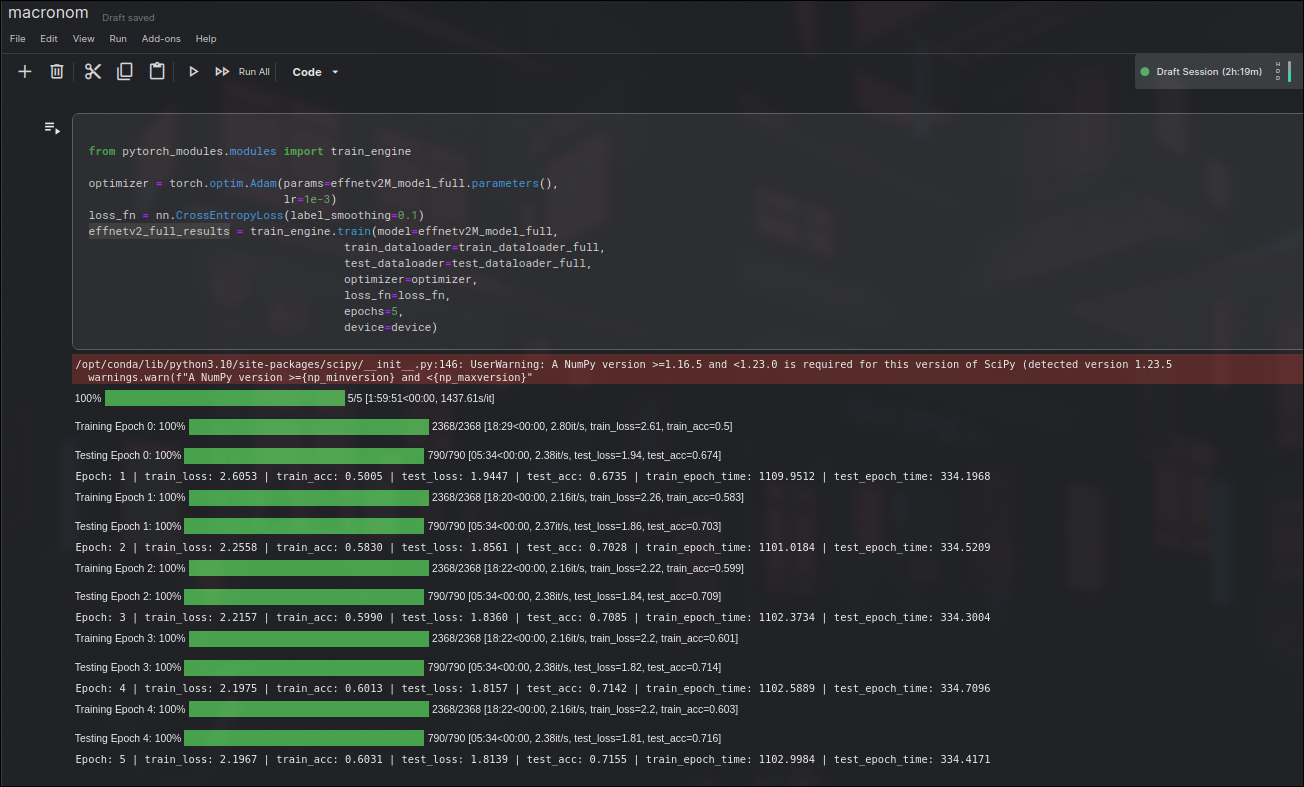

In [ ]:
effnetv2M_model_full.state_dict()

In [20]:
from pytorch_modules.modules import utils
utils.save_model(model=effnetv2M_model_full,
        target_dir="models",
          model_name="effnetv2m_food101_5epochs.pth")


[INFO] Saving model to: models/effnetv2m_food101_5epochs.pth


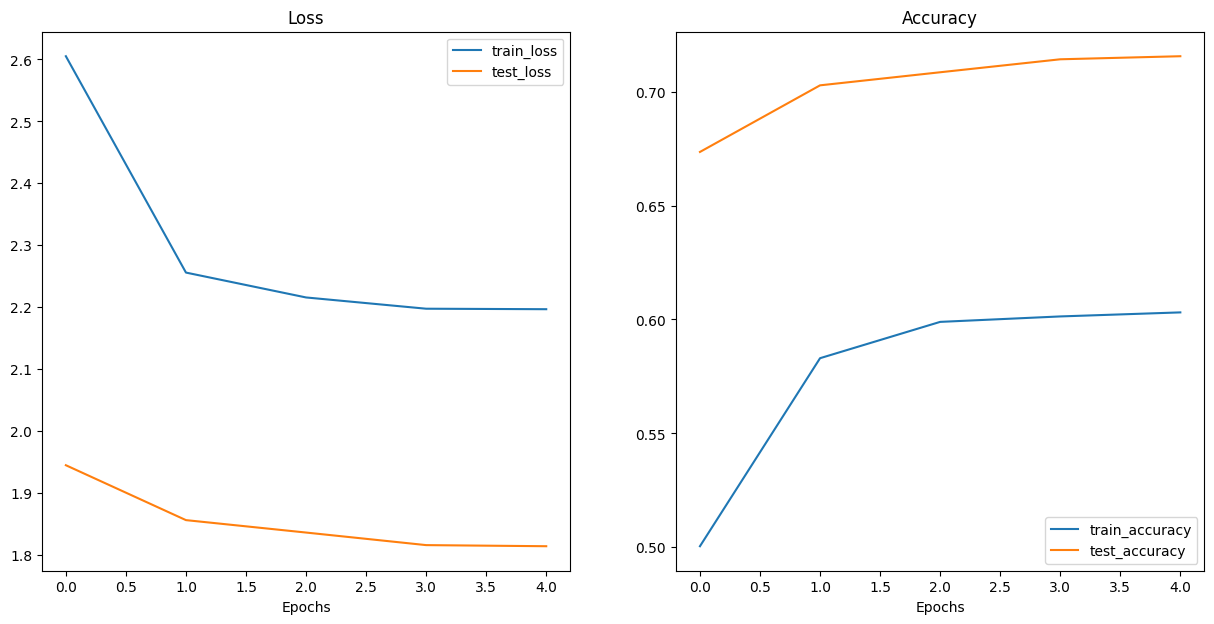

In [21]:
utils.plot_loss_curves(effnetv2_full_results)